In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
class regressor():
    def __init__(self, lamda=0):
        self.lamda = lamda
        
    def fit(self, X, y):
        ones_matrix = np.fromfunction(lambda x,y: x==y, (X.shape[1], X.shape[1])).astype(int)
        self.w = (np.linalg.inv(X.T @ X + self.lamda * ones_matrix) @ X.T) @ y
        
    def predict(self, X):
        return X @ self.w

In [50]:
def classifier_error(y_true, y_pred):
    y_pred = (y_pred > 0).astype(int)*2 - 1
    return sum(y_true != y_pred)/len(y_true)

In [51]:
df_train = pd.read_csv("in.dta.txt", sep = '\s+', names=['x1', 'x2', 'y'])
df_test = pd.read_csv("out.dta.txt", sep = '\s+', names=['x1', 'x2', 'y'])

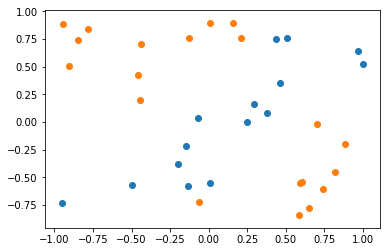

In [52]:
plt.scatter(df_train[df_train.y==-1]['x1'], df_train[df_train.y==-1]['x2'])
plt.scatter(df_train[df_train.y==1]['x1'], df_train[df_train.y==1]['x2'])

In [53]:
df_train["f1"] = df_train["x1"]**2
df_train["f2"] = df_train["x2"]**2
df_train["f3"] = df_train["x1"]*df_train["x2"]
df_train["f4"] = np.absolute(df_train["x1"] - df_train["x2"])
df_train["f4"] = np.absolute(df_train["x1"] + df_train["x2"])
df_train["ones"] = 1

df_test["f1"] = df_test["x1"]**2
df_test["f2"] = df_test["x2"]**2
df_test["f3"] = df_test["x1"]*df_test["x2"]
df_test["f4"] = np.absolute(df_test["x1"] - df_test["x2"])
df_test["f4"] = np.absolute(df_test["x1"] + df_test["x2"])
df_test["ones"] = 1

columns = df_train.columns
columns = np.array(["ones"] + list(columns[columns != "ones"]))

df_train = df_train[columns]
df_test = df_test[columns]

y_train = df_train['y'].values
X_train = df_train[columns[columns!='y']].values

y_test = df_test['y'].values
X_test = df_test[columns[columns!='y']].values

#### Без регуляризации

In [54]:
clf = regressor()
clf.fit(X_train, y_train)

In [55]:
y_pred = clf.predict(X_train)
print("Ошибка на train: ",classifier_error(y_train, y_pred))

y_pred = clf.predict(X_test)
print("Ошибка на test: ",classifier_error(y_test, y_pred))

Ошибка на train:  0.08571428571428572
Ошибка на test:  0.136


#### С регуляризацией

In [56]:
clf = regressor(lamda=0.001)
clf.fit(X_train, y_train)

In [57]:
y_pred = clf.predict(X_train)
print("Ошибка на train: ",classifier_error(y_train, y_pred))

y_pred = clf.predict(X_test)
print("Ошибка на test: ",classifier_error(y_test, y_pred))

Ошибка на train:  0.08571428571428572
Ошибка на test:  0.136
